In [1]:
# This script illustrates the effects of regularization for Logistic Regression. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_digits
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# load the data set
# See '2 - Decision Trees' for a description of this data set
digits = load_digits()

In [2]:
## Pre-process the data set

X, y = digits.data, digits.target

# Standardize features by removing the mean and scaling to unit variance.
X = StandardScaler().fit_transform(X)
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples
# in the training set. Mean and standard deviation are then stored to be used on later data using the transform
# method.
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave
# badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian
# with 0 mean and unit variance).
# For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of
# Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered
# around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger
# that others, it might dominate the objective function and make the estimator unable to learn from other features
# correctly as expected.

# classify small against large digits (i.e., convert the task from multi-class classification to binary classification)
y = (y > 4).astype(np.int)

C=100.00
Sparsity with L1 penalty: 4.69%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8609
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


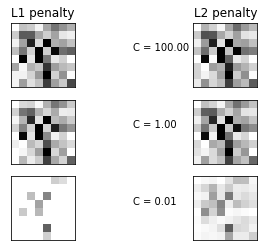

In [3]:
# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # we create an instance of the Classifier
    # turn down tolerance for short training time
    clf_l1_LR = linear_model.LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = linear_model.LogisticRegression(C=C, penalty='l2', tol=0.01)
    

    # Train the model (fit the data)    
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    # Get the coefficients of the models
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))
    # score() returns the mean accuracy on the given test data and labels.
    
    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

In [4]:
# What differences do you observe between L1 and L2 regularization?

# The C parameter controls the amount of regularization in the LogisticRegression object: a large value
# for C results in less regularization. penalty="l2" gives Shrinkage (i.e. non-sparse coefficients), while
# penalty="l1" gives Sparsity.